In [4]:
# Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
# Load dataset

file_path = '/Users/vaishakhmenon/Downloads/IIMK_DSAI_W15_Graded Assignment 15.2_Data Set.xlsm - CarPrice_Assignment.csv'
data = pd.read_csv(file_path)

In [6]:
# Display the first few rows
print("Dataset Loaded Successfully!")
print(data.head())

# Print column name

print("Column names in the dataset:")
print(data.columns)

Dataset Loaded Successfully!
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio h

In [7]:
# Data Visualization and Augmentation

# Check missing values
print("Missing values in the dataset:")
print(data.isnull().sum())

Missing values in the dataset:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


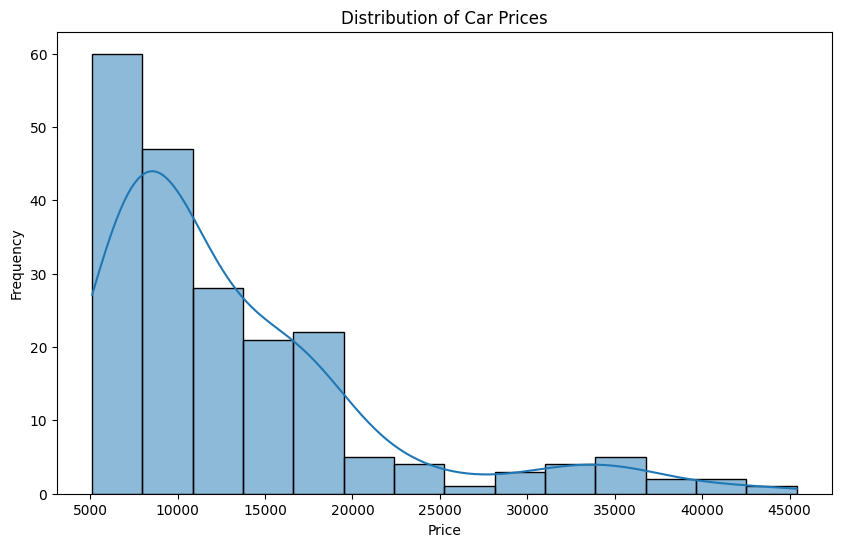

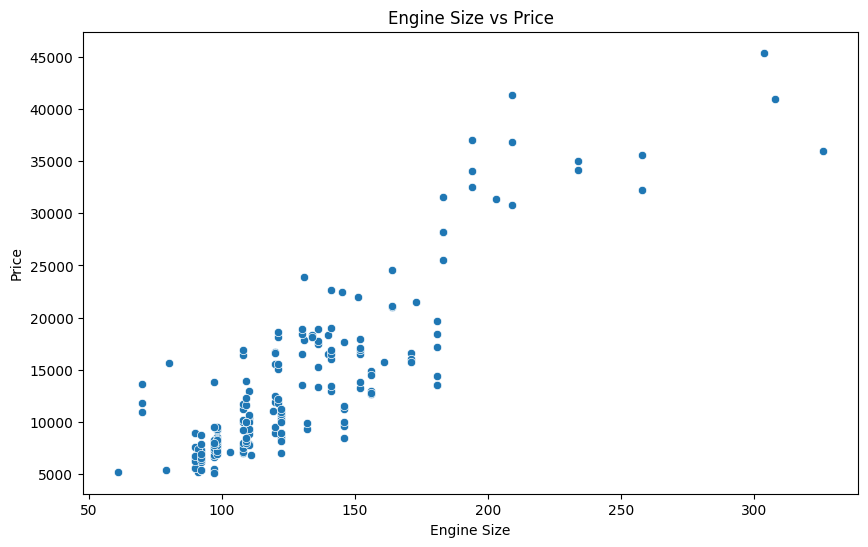

In [8]:
# Plot EDA graphs
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='enginesize', y='price', data=data)
plt.title('Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

In [9]:
# Data Preprocessing

# Handle missing values if any values available
data = data.dropna()

In [10]:
# Split data to features and target variable
X = data.drop(columns=['price'])
y = data['price']


In [11]:
# Convert category variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Print shapes train and test data
print("Shape of X_train:", X_train_scaled.shape)
print("Shape of X_test:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (164, 190)
Shape of X_test: (41, 190)
Shape of y_train: (164,)
Shape of y_test: (41,)


In [15]:
# Decision Tree Regression Model Building

# Initialise the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train model on train data
dt_regressor.fit(X_train_scaled, y_train)

# Print model summary
print("Decision Tree Regressor Model Summary:")
print(dt_regressor)

Decision Tree Regressor Model Summary:
DecisionTreeRegressor(random_state=42)


In [16]:
# Random Forest Regression Model Building

# Initialise Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model on train data
rf_regressor.fit(X_train_scaled, y_train)

# Print model summary
print("Random Forest Regressor Model Summary:")
print(rf_regressor)


Random Forest Regressor Model Summary:
RandomForestRegressor(random_state=42)


In [17]:
# Model Evaluation

# Predict train and test datasets using Decision Tree
y_train_pred_dt = dt_regressor.predict(X_train_scaled)
y_test_pred_dt = dt_regressor.predict(X_test_scaled)

In [18]:
# Predict train and test datasets using Random Forest
y_train_pred_rf = rf_regressor.predict(X_train_scaled)
y_test_pred_rf = rf_regressor.predict(X_test_scaled)

In [19]:
# Evaluate metrics for Decision Tree
mse_train_dt = mean_squared_error(y_train, y_train_pred_dt)
mse_test_dt = mean_squared_error(y_test, y_test_pred_dt)
rmse_train_dt = np.sqrt(mse_train_dt)
rmse_test_dt = np.sqrt(mse_test_dt)
mae_train_dt = mean_absolute_error(y_train, y_train_pred_dt)
mae_test_dt = mean_absolute_error(y_test, y_test_pred_dt)
r2_train_dt = r2_score(y_train, y_train_pred_dt)
r2_test_dt = r2_score(y_test, y_test_pred_dt)

In [20]:
print("Decision Tree Regressor Evaluation:")
print(f"Train RMSE: {rmse_train_dt}")
print(f"Test RMSE: {rmse_test_dt}")
print(f"Train MAE: {mae_train_dt}")
print(f"Test MAE: {mae_test_dt}")
print(f"Train R2: {r2_train_dt}")
print(f"Test R2: {r2_test_dt}")

Decision Tree Regressor Evaluation:
Train RMSE: 0.0
Test RMSE: 3245.4088386064104
Train MAE: 0.0
Test MAE: 2098.3089512195124
Train R2: 1.0
Test R2: 0.8665804146743344


In [21]:
# Evaluate metrics for Random Forest
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

In [22]:
print("Random Forest Regressor Evaluation:")
print(f"Train RMSE: {rmse_train_rf}")
print(f"Test RMSE: {rmse_test_rf}")
print(f"Train MAE: {mae_train_rf}")
print(f"Test MAE: {mae_test_rf}")
print(f"Train R2: {r2_train_rf}")
print(f"Test R2: {r2_test_rf}")

Random Forest Regressor Evaluation:
Train RMSE: 924.2999641094575
Test RMSE: 1911.022553627099
Train MAE: 564.5315853658537
Test MAE: 1378.8925121951215
Train R2: 0.9856746914190886
Test R2: 0.9537392805715006


In [ ]:
# Decision Tree - the train data model has perfectly fit the training data.
# Decision Tree - the test data model is overfitting the test data.
# Random Forest - the train data model has good fit but decision tree shows better fit comparitively
# Random Forest - the test data model has good fit and better performance compared to decision tree test model 
# Random Forest shows better generalised performance compared to decisio